In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit import TorsionScanSet as ScanSet
import torsionfit.TorsionFitModel as Model
from torsionfit import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots
from matplotlib.backends.backend_pdf import PdfPages
from torsionfit import utils
#import seaborn as sbn

In [2]:
db = sqlite_plus.load('butane_all_n5_decouple_n_10000.db')

In [3]:
param_to_opt = utils.get_sampled_torsions(db)

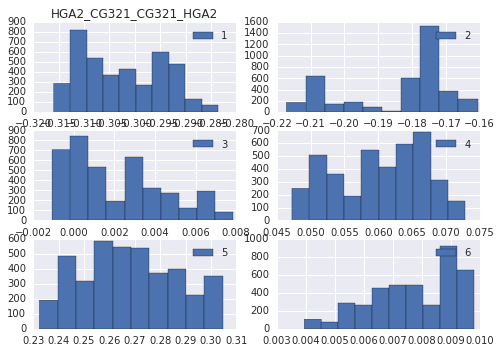

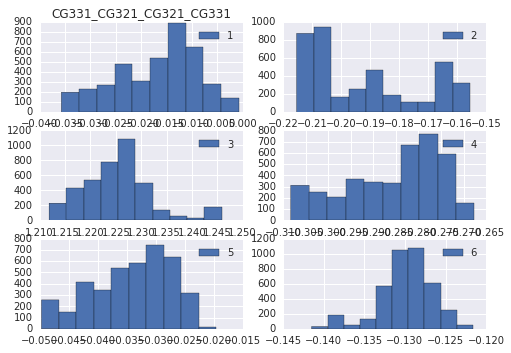

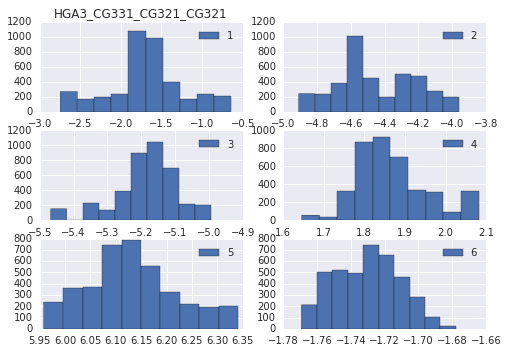

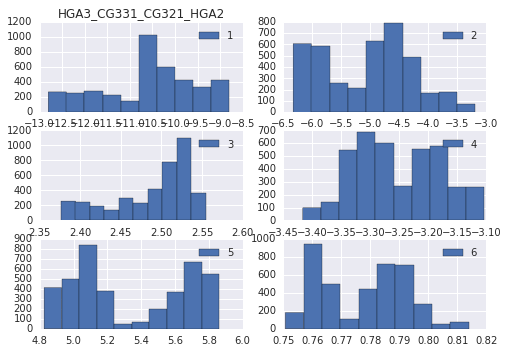

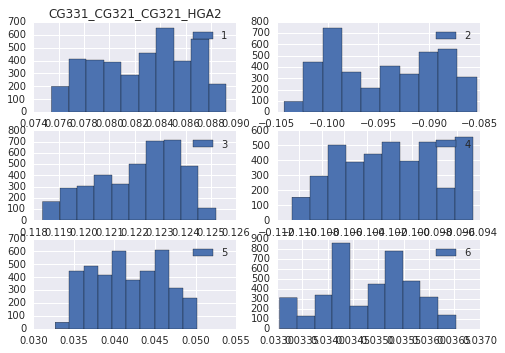

In [16]:
multiplicities = ['1', '2', '3', '4', '5', '6']
with PdfPages('param_hist.pdf') as pdf:
    for torsion in param_to_opt:
        for n, m in enumerate(multiplicities):
            if n==1:
                plt.title(torsion)
            plt.subplot(3, 2, int(m))
            k = torsion + '_' + m + '_K'
            plt.hist(getattr(db, k)[6000:], label=m)
            plt.legend()
        pdf.savefig()
        plt.show()
        plt.close()

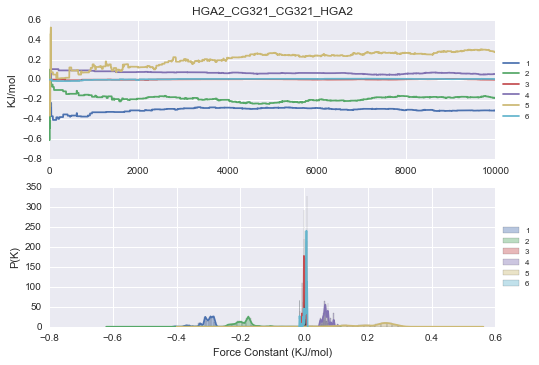

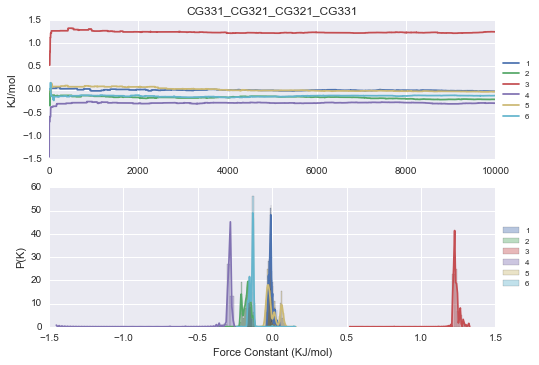

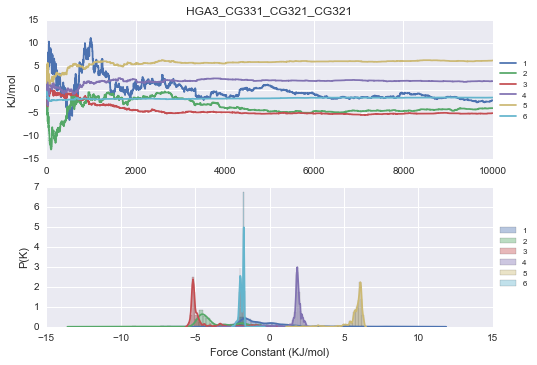

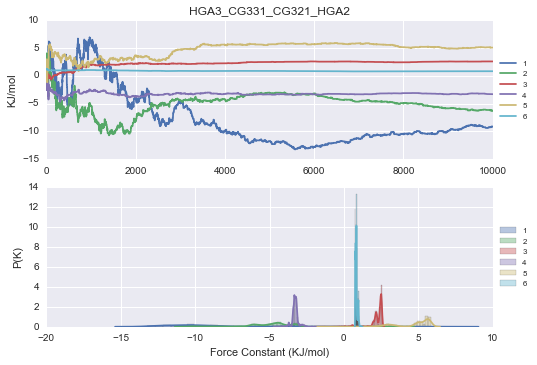

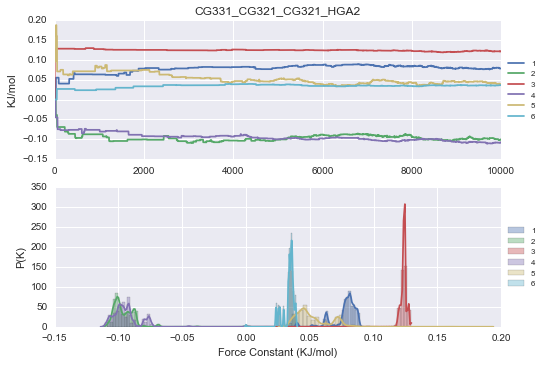

In [4]:
import seaborn as sbn
multiplicities = ['1', '2', '3', '4', '5', '6']
colors = ['red', 'orange', 'gold', 'green', 'blue', 'violet']
with PdfPages('trace_hist_all_sbn.pdf') as pdf:
    for torsion in param_to_opt:
        for n, m in enumerate(multiplicities):
            plt.subplot(2, 1, 1)
            if n==1:
                plt.title(torsion)
            
            #plt.subplot(3, 2, int(m))
            k = torsion + '_' + m + '_K'
            plt.plot(getattr(db, k)[:], label=m)
            plt.ylabel('KJ/mol')
            lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
            plt.subplot(2, 1, 2)
            sbn.distplot(getattr(db, k)[:], label=m)
            plt.ylabel('P(K)')
            plt.xlabel('Force Constant (KJ/mol)')
            lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
        pdf.savefig()
        plt.show()
        plt.close()

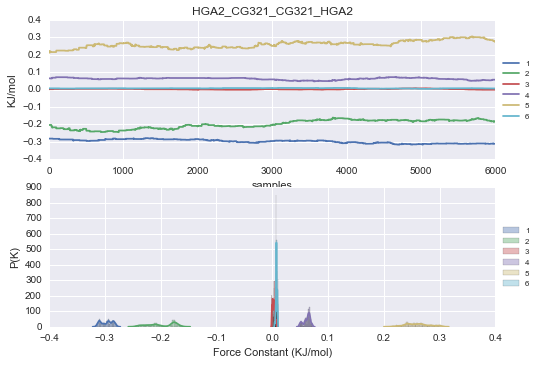

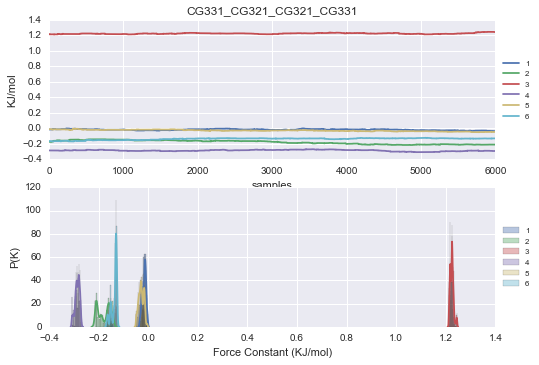

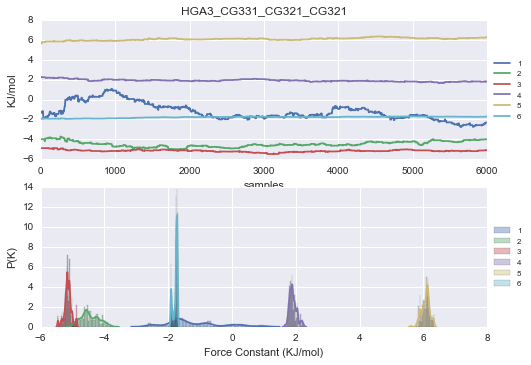

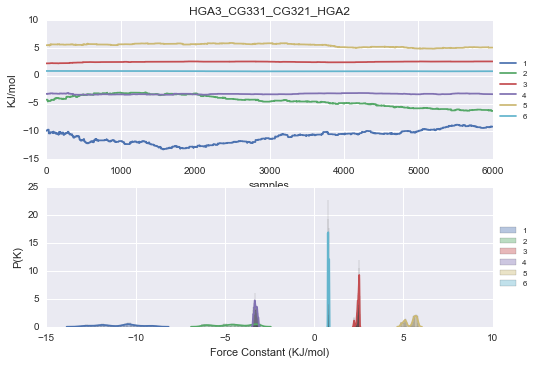

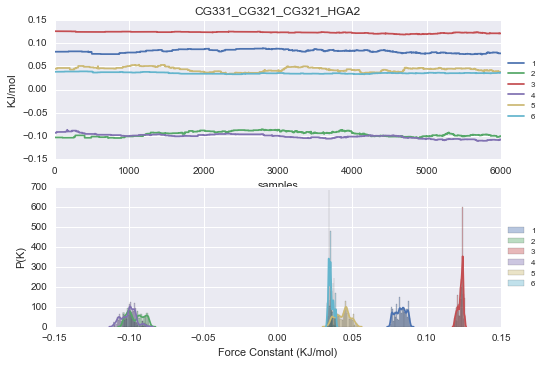

In [5]:
multiplicities = ['1', '2', '3', '4', '5', '6']
colors = ['red', 'orange', 'gold', 'green', 'blue', 'violet']
with PdfPages('trace_hist_equil_sbn.pdf') as pdf:
    for torsion in param_to_opt:
        for n, m in enumerate(multiplicities):
            plt.subplot(2, 1, 1)
            if n==1:
                plt.title(torsion)
            
            #plt.subplot(3, 2, int(m))
            k = torsion + '_' + m + '_K'
            plt.plot(getattr(db, k)[4000:], label=m)
            plt.ylabel('KJ/mol')
            plt.xlabel('samples')
            lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
            plt.subplot(2, 1, 2)
            sbn.distplot(getattr(db, k)[4000:], label=m)
            plt.ylabel('P(K)')
            plt.xlabel('Force Constant (KJ/mol)')
            lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))
        pdf.savefig()
        plt.show()
        plt.close()

In [6]:
param = CharmmParameterSet('../../../data/charmm_ff/top_all36_cgenff.rtf', 
                           '../../../data/charmm_ff/par_all36_cgenff.prm')
structure = '../structure/butane.psf'
scan = '../MP2_torsion_scan/'

In [7]:
butane_scan = ScanSet.parse_psi4_out(scan, structure)
butane_scan.compute_energy(param)
optimized = butane_scan.remove_nonoptimized()
optimized.compute_energy(param)

[Psi /Users/sternc1/src/ChayaSt/Torsions/examples/butane/all_torsions/../MP2_torsion_scan/0/butane_0.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/Torsions/examples/butane/all_torsions/../MP2_torsion_scan/10/butane_10.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/Torsions/examples/butane/all_torsions/../MP2_torsion_scan/20/butane_20.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/Torsions/examples/butane/all_torsions/../MP2_torsion_scan/30/butane_30.out2 WARNING] In logfileparser.py, line 468, line not all dashes as 

In [6]:
plt.plot(optimized.mm_energy)
plt.plot(optimized.qm_energy)
plt.plot(db.mm_energy[-1])
plt.plot(optimized.delta_energy)
plt.plot(optimized.qm_energy._value - db.mm_energy[-1])

NameError: name 'optimized' is not defined

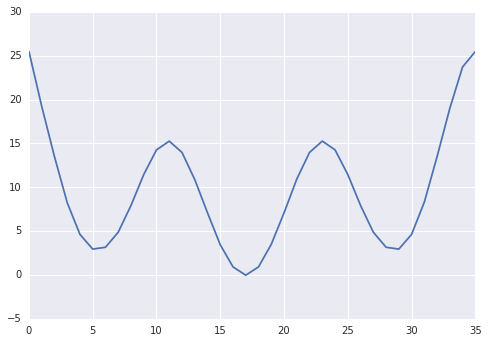

In [27]:
plt.plot(db.mm_energy[-1])

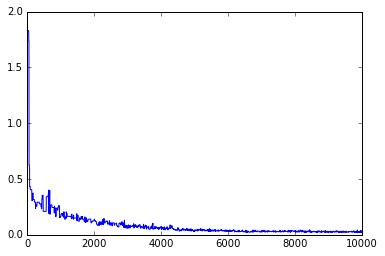

In [7]:
plt.plot(db.sigma[:])